In [15]:
from modulos import eda, ann
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [11]:
manaus = eda.data_processing('Cotas extraidas', '1903-01-01', '2024-12-31', ['dados_diarios_estacao_14990000.csv'])
manaus

,14990000
Data,
1903-01-01,1914.0
1903-01-02,1921.0
1903-01-03,1924.0
1903-01-04,1926.0
1903-01-05,1929.0
...,...
2024-12-27,1751.0
2024-12-28,1769.0
2024-12-29,1785.0


In [ ]:
split_date = '2000-01-01'
manaus_train, manaus_test = manaus[manaus.index < split_date], manaus[manaus.index >= split_date]
split = manaus_train.shape[0]

In [ ]:
janela = 15
steps = 15

# Criação de janelas
X, y = ml_func.create_multi_step_dataset(manaus.values, janela, steps)

# Separação dos cojuntos
x_train = X[:split-janela]
y_train = y[:split-janela]

x_test = X[split-janela:]
y_test = y[split-janela:]

# Normalização dos dados
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)

y_train = y_scale.fit_transform(y_train)



In [ ]:
mlps = []
lstms = []

for i in range(10):
    print(f'Iteração {i+1}')
    mlp = ann.build_model_mlp((30, 30), janela, steps)
    mlp.fit(x_train, y_train, epochs=100, verbose=0)
    pred1 = mlp.predict(x_test, verbose=0)
    pred1_inv = y_scale.inverse_transform(pred1)
    r2_mlp = r2_score(y_test, pred1_inv)
    mlps.append([mlp, r2_mlp, pred1_inv])

    lstm = ann.build_model_lstm(30, janela, steps)
    lstm.fit(x_train, y_train, epochs=100, verbose=0)
    pred2 = lstm.predict(x_test, verbose=0)
    pred2_inv = y_scale.inverse_transform(pred2)
    r2_lstm = r2_score(y_test, pred2_in)
    lstms.append([lstm, r2_lstm, pred2_inv])

In [ ]:
manaus = manaus[~((manaus.index.month == 2) & (manaus.index.day == 29))]
manaus['mes-dia'] = manaus.index.strftime('%m-%d')

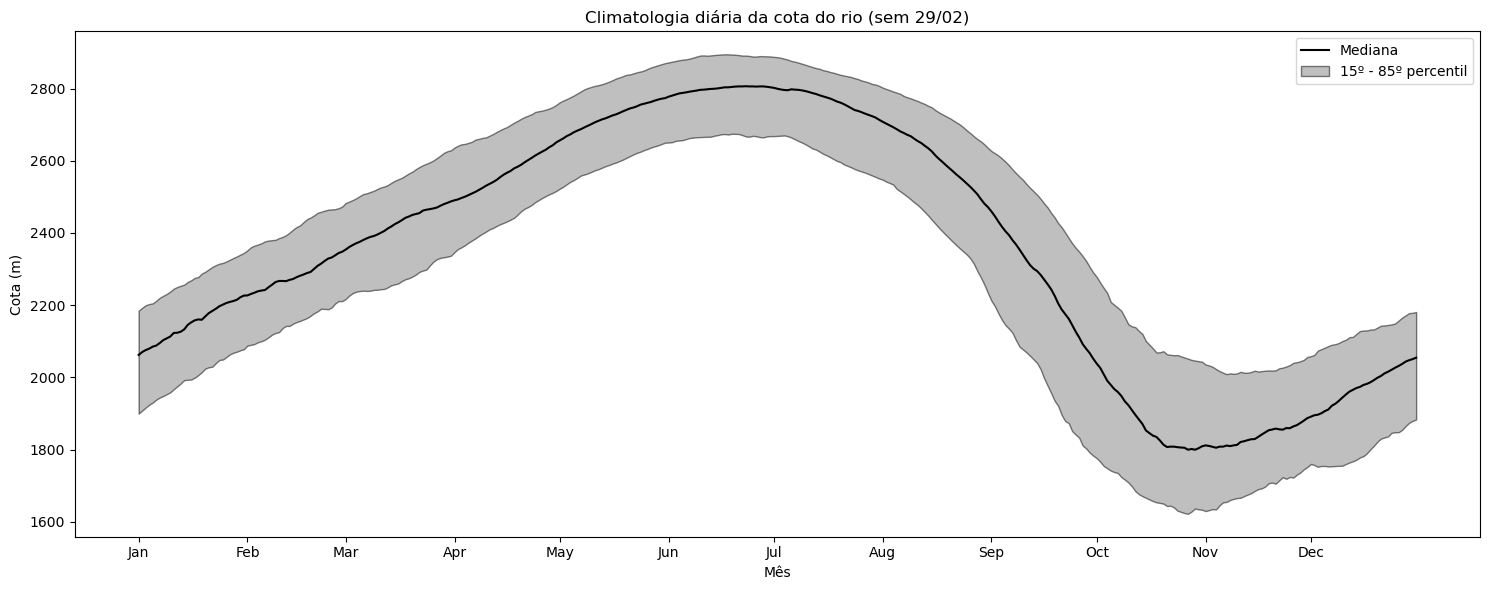

In [13]:
# Calcular estatísticas
climatologia = manaus.groupby('mes-dia')['14990000'].agg([
    ('mediana', 'median'),
    ('p10', lambda x: x.quantile(0.15)),
    ('p90', lambda x: x.quantile(0.85))
]).sort_index()

# Criar um índice artificial de 365 dias (sem ano bissexto)
dias = pd.date_range("2001-01-01", "2001-12-31", freq="D")  # 2001 não é bissexto
climatologia.index = dias.strftime("%m-%d")  # alinhar
climatologia['data'] = dias

# Plot
plt.figure(figsize=(15,6))
plt.plot(climatologia['data'], climatologia['mediana'], label='Mediana', color='black')
plt.fill_between(
    climatologia['data'],
    climatologia['p10'],
    climatologia['p90'],
    facecolor='gray', edgecolor='black', alpha=0.5, label='15º - 85º percentil'
)

# Ajustar ticks mensais
plt.xticks(
    pd.date_range("2001-01-01", "2001-12-31", freq="MS"),  # início de cada mês
    [d.strftime("%b") for d in pd.date_range("2001-01-01", "2001-12-31", freq="MS")],
    rotation=0
)

plt.xlabel("Mês")
plt.ylabel("Cota (m)")
plt.title("Climatologia diária da cota do rio (sem 29/02)")
plt.legend()
plt.tight_layout()
plt.show()